# 1. Intro

* nama : Iqbal Awis N
* batch : RMT-19


## Problem Identification

Predicting house prices can assist buyers and sellers in determining a fair price for the house they want to buy or sell. By knowing the estimated price, they can make more informed and strategic decisions. Predicting house prices is also important for long-term financial planning. For instance, if someone plans to buy a house in the future, they can use the prediction of house prices to set savings targets and develop their financial plans.

## Objective

Creating a house price prediction model for prospective buyers and sellers based on the condition of the houses they are buying or selling with accurate prediction levels and low error rates.

# 2. Import Libraries


In [1]:
# Data Loading
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from feature_engine.outliers import Winsorizer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from scipy.stats import chi2_contingency
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Modeling
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Evaluasi
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score

# Saving
import json
import pickle
import joblib


# 3. Data Loading

In [2]:
# Load Data
df = pd.read_csv('ParisHousing.csv')

In [3]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [4]:
df.head(10)

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.500
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.500
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.100
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.200
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.000
5,39223,36,0,1,17,39489,8,6,2012,0,1,2009,4552,757,0,1,3926647.200
6,58682,10,1,1,99,6450,10,9,1995,1,1,5930,9453,848,0,5,5876376.500
7,86929,100,1,0,11,98155,3,4,2003,1,0,6326,4748,654,0,10,8696869.300
8,51522,3,0,0,61,9047,8,3,2012,1,1,632,5792,807,1,5,5154055.200
9,39686,42,0,0,15,71019,5,8,2021,1,1,5198,5342,591,1,3,3970892.100


In [5]:
df.tail(10)

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
9990,5537,65,0,1,24,5808,8,6,2012,0,1,3974,5726,762,0,2,560359.200
9991,96173,12,1,0,36,36812,7,7,2015,1,1,837,3716,564,0,9,9623811.500
9992,33545,55,0,1,79,8288,1,2,2006,1,0,3480,4046,946,1,6,3361070.600
9993,341,83,0,0,8,1960,4,4,1993,1,1,2366,4016,229,1,5,35371.300
9994,21514,5,0,1,11,91373,1,1,1999,0,0,2584,5266,787,0,3,2153602.900
9995,1726,89,0,1,5,73133,7,6,2009,0,1,9311,1698,218,0,4,176425.900
9996,44403,29,1,1,12,34606,9,4,1990,0,1,9061,1742,230,0,0,4448474.000
9997,83841,3,0,0,69,80933,10,10,2005,1,1,8304,7730,345,1,9,8390030.500
9998,59036,70,0,0,96,55856,1,3,2010,0,1,2590,6174,339,1,4,5905107.000
9999,1440,84,0,0,49,18412,6,10,1994,1,0,8485,2024,278,1,6,146708.400


In [6]:
df.shape

(10000, 17)

In [7]:
df.duplicated().sum()

0

# 4. EDA

In [8]:
df_manipulated = df.copy()

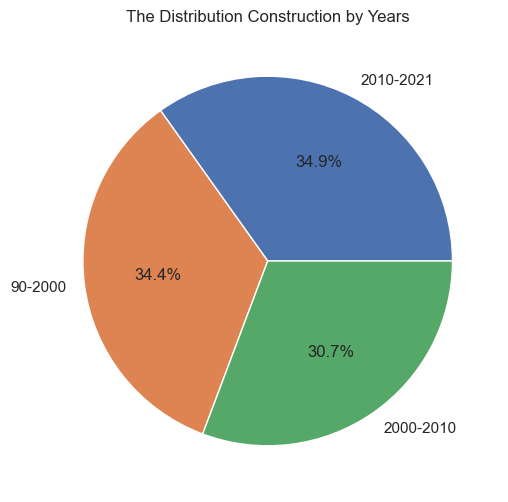

In [9]:
# Determine the boundaries of groups
bins = [90, 2000, 2010, 2021]

# Create a new column 'made_group' based on the grouping
df_manipulated['made_group'] = pd.cut(df_manipulated['made'], bins=bins, labels=['90-2000', '2000-2010', '2010-2021'])

count_made_group = df_manipulated['made_group'].value_counts()

# create pie chart using Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(6, 6))
plt.pie(count_made_group, labels=count_made_group.index, autopct='%1.1f%%')

# plot title
plt.title('The Distribution Construction by Years')

# show plot
plt.show()

In [10]:
df_manipulated['made_group'].value_counts()

2010-2021    3485
90-2000      3443
2000-2010    3072
Name: made_group, dtype: int64

In [11]:
df['price'].describe()

count      10000.000
mean     4993447.526
std      2877424.110
min        10313.500
25%      2516401.950
50%      5016180.300
75%      7469092.450
max     10006771.200
Name: price, dtype: float64

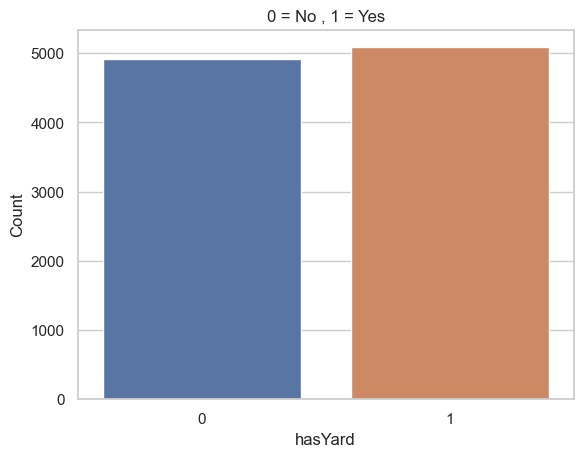

In [12]:

# count coloumns 'hasYard'
count_hasyard = df['hasYard'].value_counts()

# create barplot using  Seaborn
sns.barplot(x=count_hasyard.index, y=count_hasyard.values)

# add title and x y axis
plt.title('0 = No , 1 = Yes')
plt.xlabel('hasYard')
plt.ylabel('Count')

# show plot
plt.show()

In [13]:
df['hasYard'].value_counts()

1    5087
0    4913
Name: hasYard, dtype: int64

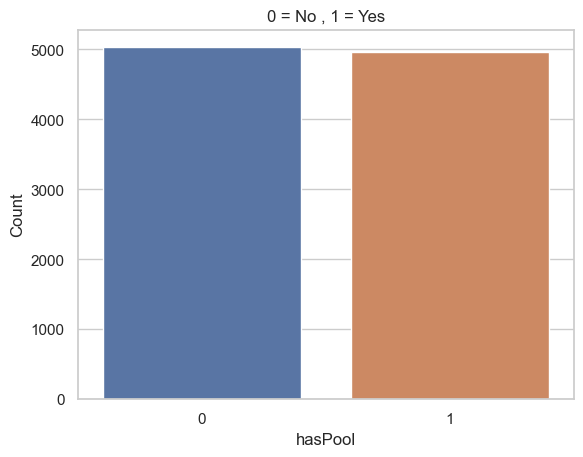

In [14]:
# count coloums 'hasPool'
count_pool = df['hasPool'].value_counts()

# create bar plot using Seaborn
sns.barplot(x=count_pool.index, y=count_pool.values)

# add title and x,y axis
plt.title('0 = No , 1 = Yes')
plt.xlabel('hasPool')
plt.ylabel('Count')

# show plot
plt.show()

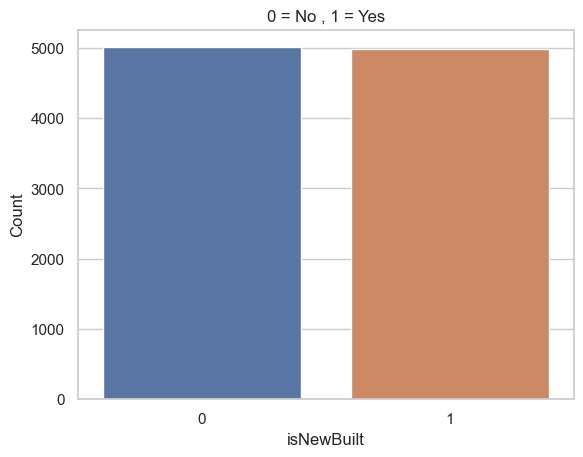

In [15]:

# count coloums 'isNewBuilt'
count_new = df['isNewBuilt'].value_counts()

# create bar plot using Seaborn
sns.barplot(x=count_new.index, y=count_new.values)

# add title and x,y axis
plt.title('0 = No , 1 = Yes')
plt.xlabel('isNewBuilt')
plt.ylabel('Count')

# show plot
plt.show()

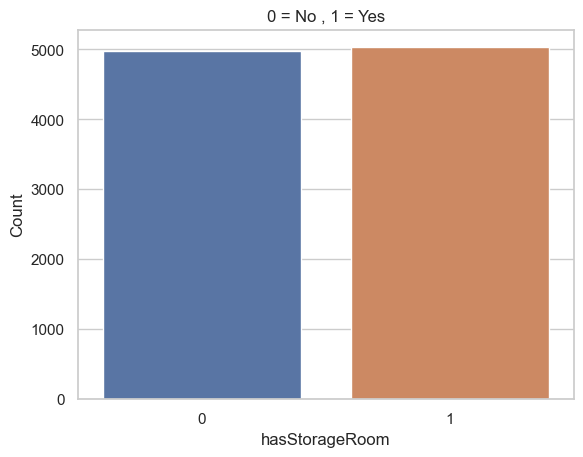

In [16]:

# count coloums 'hasStorageRoom'
count_storage = df['hasStorageRoom'].value_counts()

# create bar plot using Seaborn
sns.barplot(x=count_storage.index, y=count_storage.values)

# add title and x,y axis
plt.title('0 = No , 1 = Yes')
plt.xlabel('hasStorageRoom')
plt.ylabel('Count')

# show plot
plt.show()

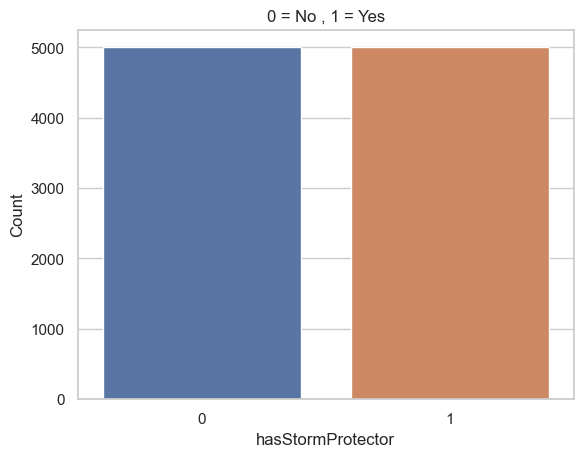

In [17]:

# count coloums 'hasStormProtector'
count_storm = df['hasStormProtector'].value_counts()

# create barplot using Seaborn
sns.barplot(x=count_storm.index, y=count_storm.values)

# add title and x,y axis
plt.title('0 = No , 1 = Yes')
plt.xlabel('hasStormProtector')
plt.ylabel('Count')

# show plot
plt.show()

In [75]:
# find cheepest , avg, highest price
df['price'].describe().to_frame()

,price
count,10000.000
mean,4993447.526
std,2877424.110
min,10313.500
25%,2516401.950
50%,5016180.300
75%,7469092.450
max,10006771.200


# 5. Feature Engineering

In [19]:
data = df.copy()

## Missing value

In [20]:
# Check missing value
data.isnull().sum()

squareMeters         0
numberOfRooms        0
hasYard              0
hasPool              0
floors               0
cityCode             0
cityPartRange        0
numPrevOwners        0
made                 0
isNewBuilt           0
hasStormProtector    0
basement             0
attic                0
garage               0
hasStorageRoom       0
hasGuestRoom         0
price                0
dtype: int64

## Check data distributed

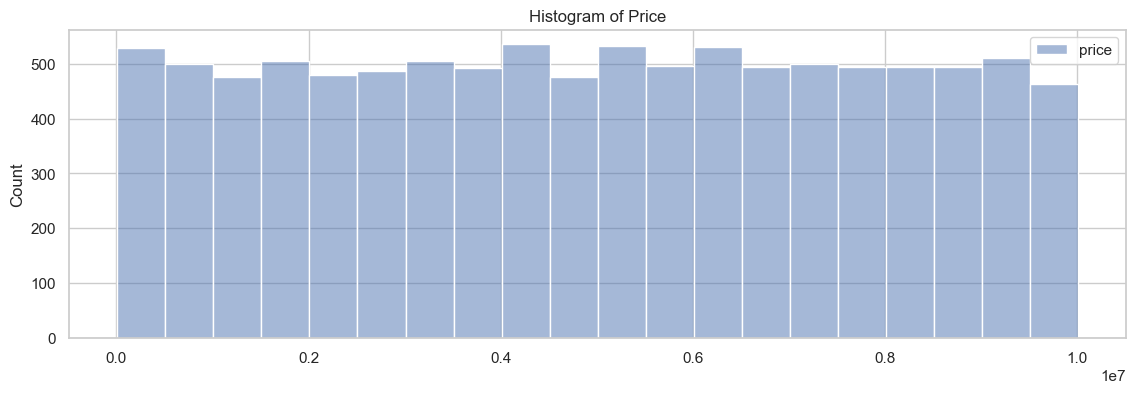

In [21]:
plt.figure(figsize=(30,4))
plt.subplot(1,2,1)
sns.histplot(df[['price']],bins=20)
plt.title('Histogram of Price')
plt.show()

In [22]:
# function to check data distribution
def diagnostic_plots(data, variable1, variable2, variable3, variable4):
    plt.figure(figsize=(18, 4))
    
    plt.subplot(1, 2, 1)
    sns.histplot(data[variable1], bins=20)
    plt.title('Histogram of ' + variable1)
    
    plt.subplot(1, 2, 2)
    sns.boxplot(data[variable1])
    plt.title('Boxplot of ' + variable1)
    
    print('Skewness Value of', variable1,':', data[variable1].skew() )
    
    plt.figure(figsize=(18, 4))
    
    plt.subplot(1, 2, 1)
    sns.histplot(data[variable2], bins=20)
    plt.title('Histogram of ' + variable2)
    
    plt.subplot(1, 2, 2)
    sns.boxplot(data[variable2])
    plt.title('Boxplot of ' + variable2)
    
    print('Skewness Value of', variable2,':', data[variable2].skew() )
    
    plt.figure(figsize=(18, 4))
    
    plt.subplot(1, 2, 1)
    sns.histplot(data[variable3], bins=20)
    plt.title('Histogram of ' + variable3)
    
    plt.subplot(1, 2, 2)
    sns.boxplot(data[variable3])
    plt.title('Boxplot of ' + variable3)

    print('Skewness Value of', variable3,':', data[variable3].skew() )

    plt.figure(figsize=(18, 4))
    
    plt.subplot(1, 2, 1)
    sns.histplot(data[variable4], bins=20)
    plt.title('Histogram of ' + variable4)
    
    plt.subplot(1, 2, 2)
    sns.boxplot(data[variable4])
    plt.title('Boxplot of ' + variable4)    
    
    print('Skewness Value of', variable4,':', data[variable4].skew() )

    plt.figure(figsize=(18, 4))
    
    plt.show()

In [23]:
# function to check data distribution
def diagnostic_plots2(data, variable1, variable2, variable3, variable4):
    plt.figure(figsize=(18, 4))
    
    plt.subplot(1, 2, 1)
    sns.histplot(data[variable1], bins=20)
    plt.title('Histogram of ' + variable1)
    
    plt.subplot(1, 2, 2)
    sns.boxplot(data[variable1])
    plt.title('Boxplot of ' + variable1)
    
    print('Skewness Value of', variable1,':', data[variable1].skew() )
    
    plt.figure(figsize=(18, 4))
    
    plt.subplot(1, 2, 1)
    sns.histplot(data[variable2], bins=20)
    plt.title('Histogram of ' + variable2)
    
    plt.subplot(1, 2, 2)
    sns.boxplot(data[variable2])
    plt.title('Boxplot of ' + variable2)
    
    print('Skewness Value of', variable2,':', data[variable2].skew() )
    
    plt.figure(figsize=(18, 4))
    
    plt.subplot(1, 2, 1)
    sns.histplot(data[variable3], bins=20)
    plt.title('Histogram of ' + variable3)
    
    plt.subplot(1, 2, 2)
    sns.boxplot(data[variable3])
    plt.title('Boxplot of ' + variable3)

    print('Skewness Value of', variable3,':', data[variable3].skew() )

    plt.figure(figsize=(18, 4))
    
    plt.subplot(1, 2, 1)
    sns.histplot(data[variable4], bins=20)
    plt.title('Histogram of ' + variable4)
    
    plt.subplot(1, 2, 2)
    sns.boxplot(data[variable4])
    plt.title('Boxplot of ' + variable4)    
    
    print('Skewness Value of', variable4,':', data[variable4].skew() )

    plt.figure(figsize=(18, 4))
    
    plt.show()

In [24]:
# function to check data distribution
def diagnostic_plots3(data, variable1, variable2, variable3, variable4):
    plt.figure(figsize=(18, 4))
    
    plt.subplot(1, 2, 1)
    sns.histplot(data[variable1], bins=20)
    plt.title('Histogram of ' + variable1)
    
    plt.subplot(1, 2, 2)
    sns.boxplot(data[variable1])
    plt.title('Boxplot of ' + variable1)
    
    print('Skewness Value of', variable1,':', data[variable1].skew() )
    
    plt.figure(figsize=(18, 4))
    
    plt.subplot(1, 2, 1)
    sns.histplot(data[variable2], bins=20)
    plt.title('Histogram of ' + variable2)
    
    plt.subplot(1, 2, 2)
    sns.boxplot(data[variable2])
    plt.title('Boxplot of ' + variable2)
    
    print('Skewness Value of', variable2,':', data[variable2].skew() )
    
    plt.figure(figsize=(18, 4))
    
    plt.subplot(1, 2, 1)
    sns.histplot(data[variable3], bins=20)
    plt.title('Histogram of ' + variable3)
    
    plt.subplot(1, 2, 2)
    sns.boxplot(data[variable3])
    plt.title('Boxplot of ' + variable3)

    print('Skewness Value of', variable3,':', data[variable3].skew() )

    plt.figure(figsize=(18, 4))
    
    plt.subplot(1, 2, 1)
    sns.histplot(data[variable4], bins=20)
    plt.title('Histogram of ' + variable4)
    
    plt.subplot(1, 2, 2)
    sns.boxplot(data[variable4])
    plt.title('Boxplot of ' + variable4)    
    
    print('Skewness Value of', variable4,':', data[variable4].skew() )

    plt.figure(figsize=(18, 4))
    
    plt.show()

In [25]:
# function to check data distribution
def diagnostic_plots4(data, variable1, variable2, variable3, variable4):
    plt.figure(figsize=(18, 4))
    
    plt.subplot(1, 2, 1)
    sns.histplot(data[variable1], bins=20)
    plt.title('Histogram of ' + variable1)
    
    plt.subplot(1, 2, 2)
    sns.boxplot(data[variable1])
    plt.title('Boxplot of ' + variable1)
    
    print('Skewness Value of', variable1,':', data[variable1].skew() )
    
    plt.figure(figsize=(18, 4))
    
    plt.subplot(1, 2, 1)
    sns.histplot(data[variable2], bins=20)
    plt.title('Histogram of ' + variable2)
    
    plt.subplot(1, 2, 2)
    sns.boxplot(data[variable2])
    plt.title('Boxplot of ' + variable2)
    
    print('Skewness Value of', variable2,':', data[variable2].skew() )
    
    plt.figure(figsize=(18, 4))
    
    plt.subplot(1, 2, 1)
    sns.histplot(data[variable3], bins=20)
    plt.title('Histogram of ' + variable3)
    
    plt.subplot(1, 2, 2)
    sns.boxplot(data[variable3])
    plt.title('Boxplot of ' + variable3)

    print('Skewness Value of', variable3,':', data[variable3].skew() )

    plt.figure(figsize=(18, 4))
    
    plt.subplot(1, 2, 1)
    sns.histplot(data[variable4], bins=20)
    plt.title('Histogram of ' + variable4)
    
    plt.subplot(1, 2, 2)
    sns.boxplot(data[variable4])
    plt.title('Boxplot of ' + variable4)    
    
    print('Skewness Value of', variable4,':', data[variable4].skew() )

    plt.figure(figsize=(18, 4))
    
    plt.show()

Skewness Value of squareMeters : -0.006418126218488671
Skewness Value of numberOfRooms : 0.0187373417297422
Skewness Value of hasYard : -0.03481049101174494
Skewness Value of hasPool : 0.01280218255945637


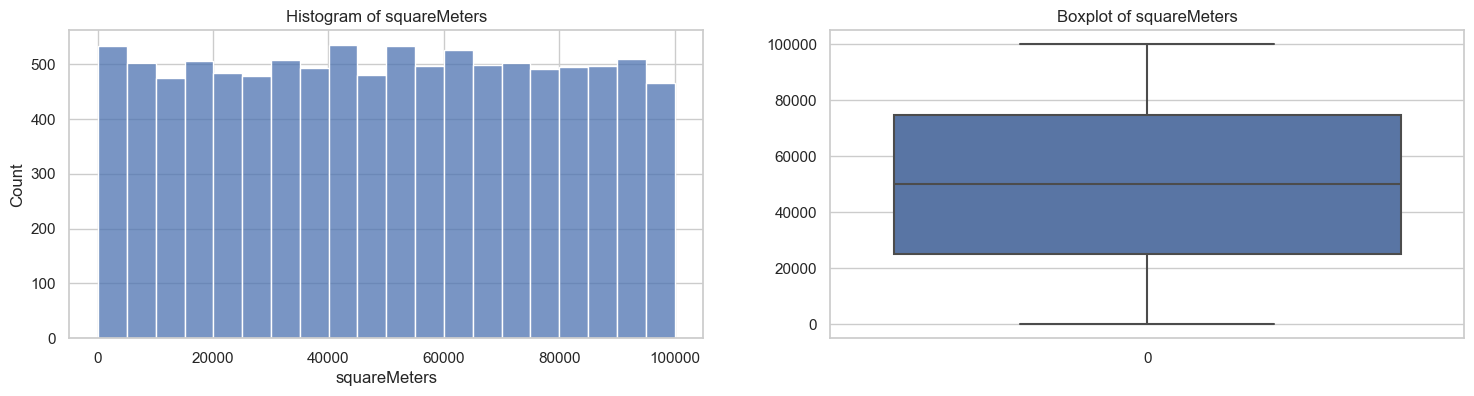

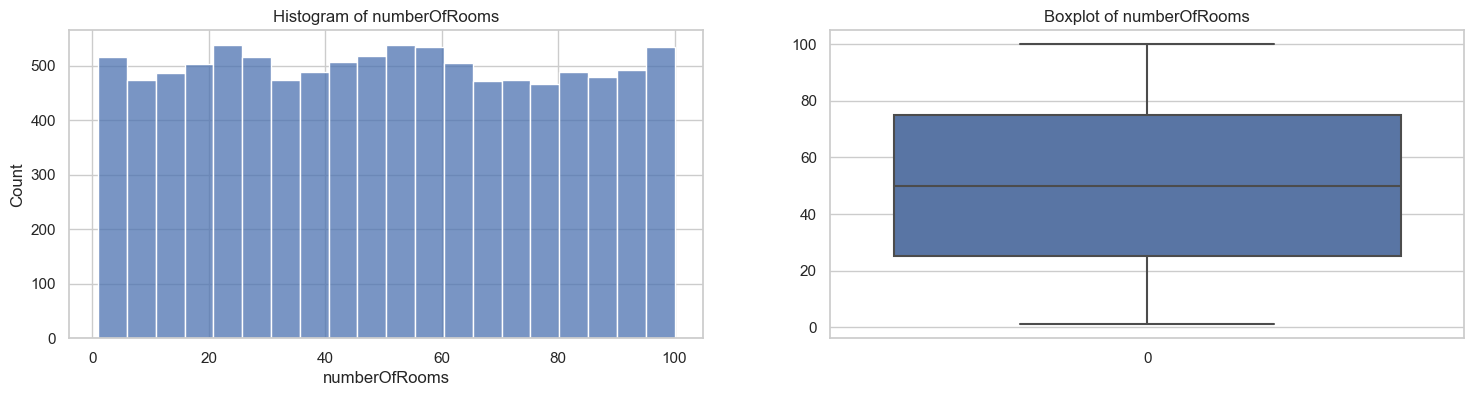

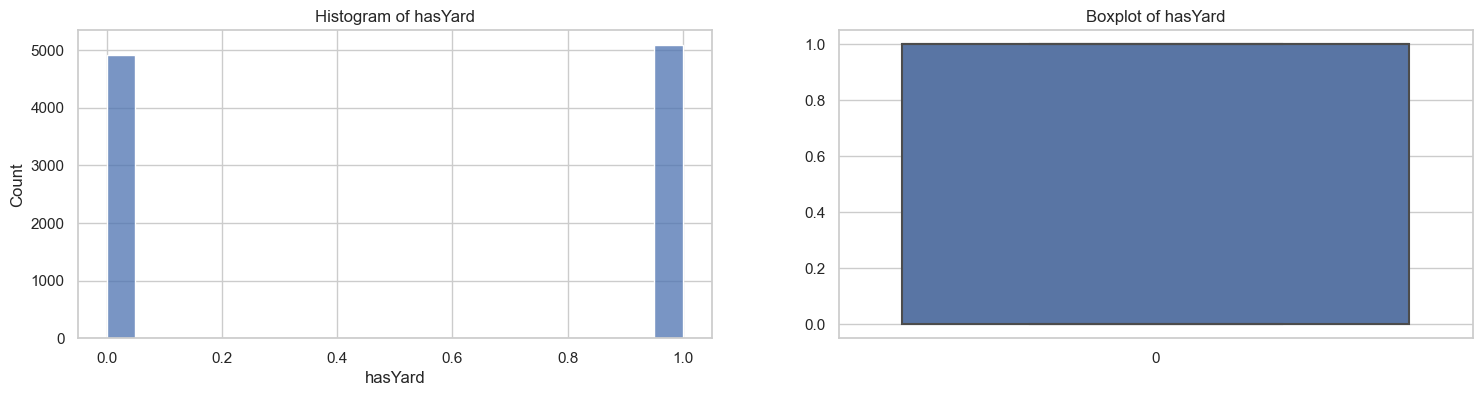

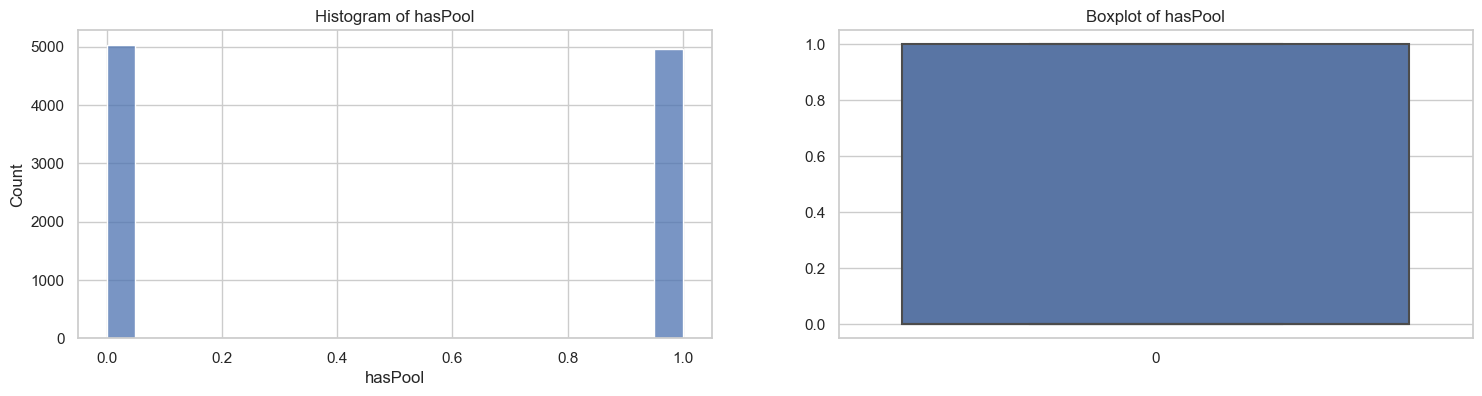

<Figure size 1800x400 with 0 Axes>

Skewness Value of floors : 0.014930628435050101
Skewness Value of cityCode : -0.02228685177154616
Skewness Value of cityPartRange : -0.003339179103415519
Skewness Value of numPrevOwners : 0.0022448613864533107


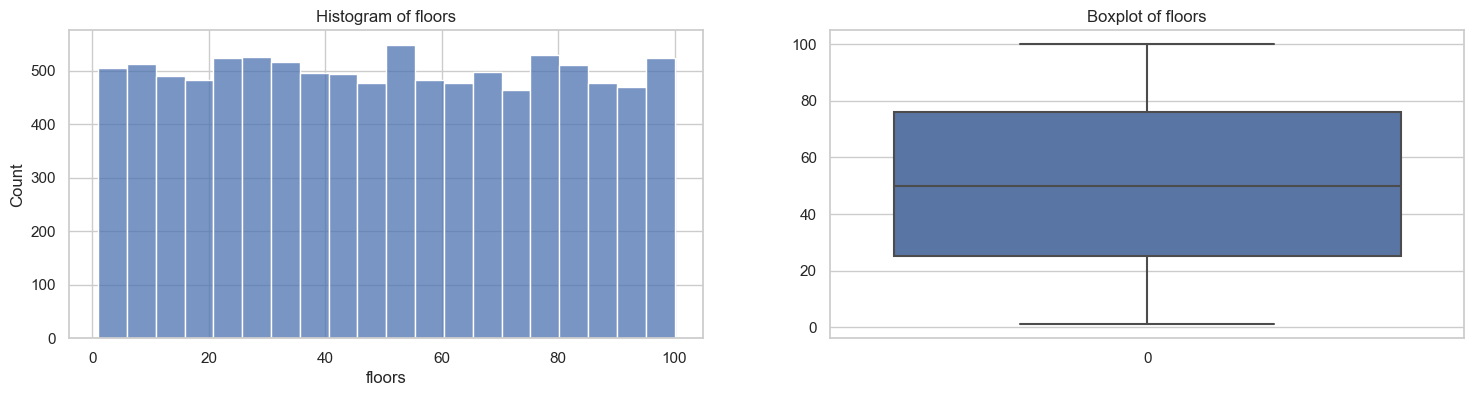

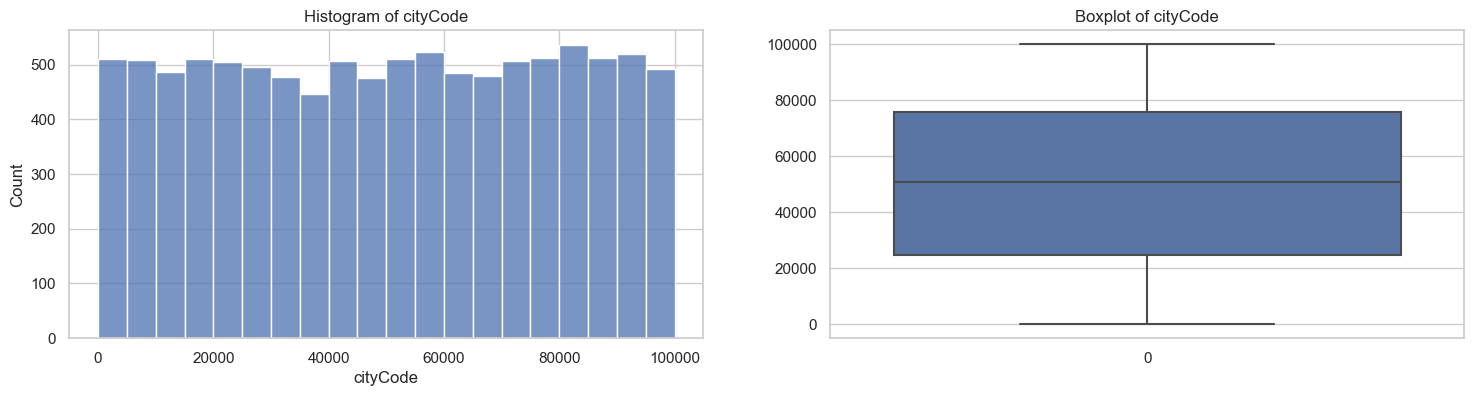

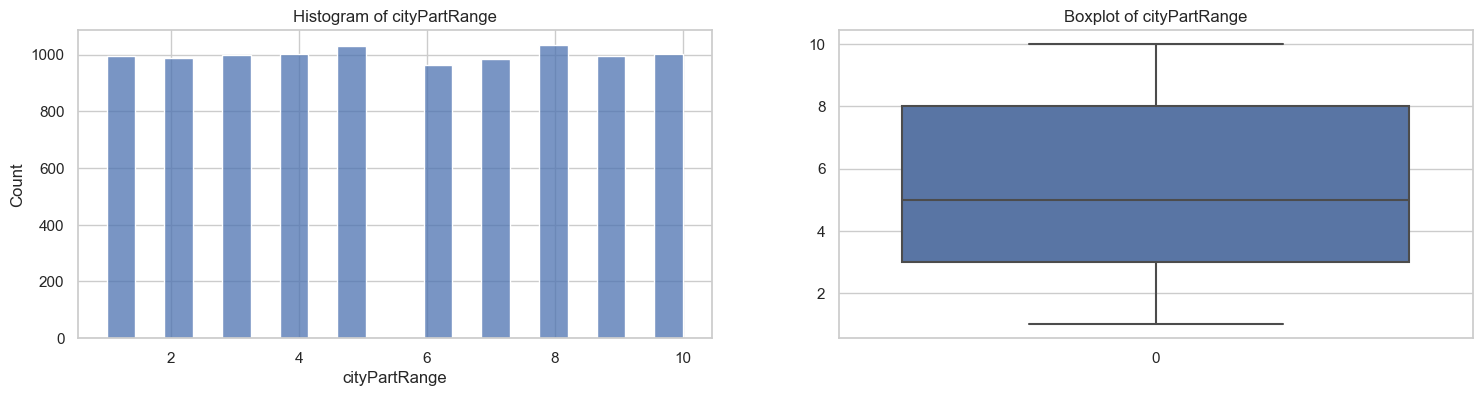

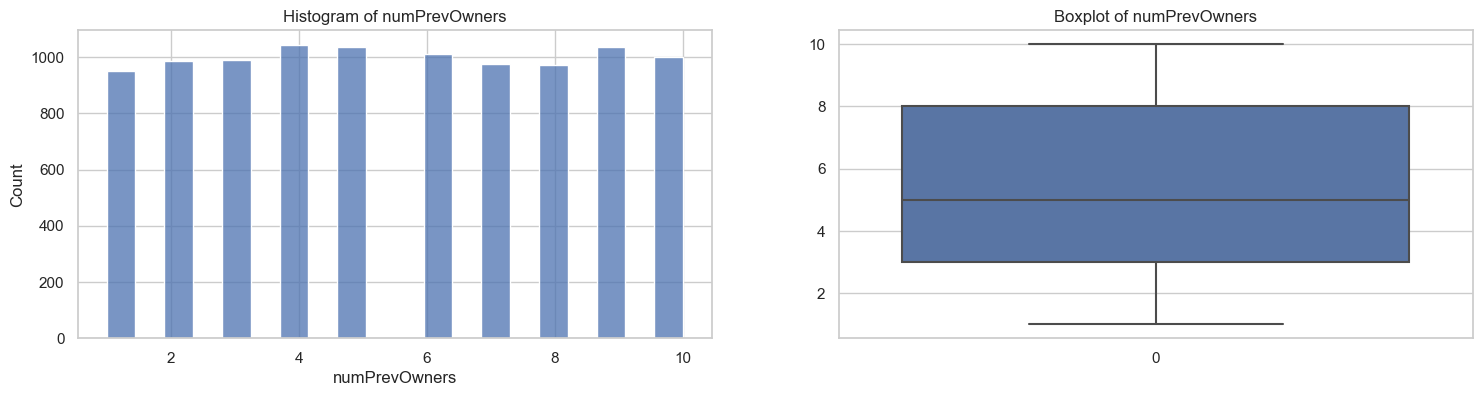

<Figure size 1800x400 with 0 Axes>

Skewness Value of made : -0.005157023057554401
Skewness Value of isNewBuilt : 0.0036005459364096834
Skewness Value of hasStormProtector : 0.00040006001950344756
Skewness Value of basement : -0.027215490182780334


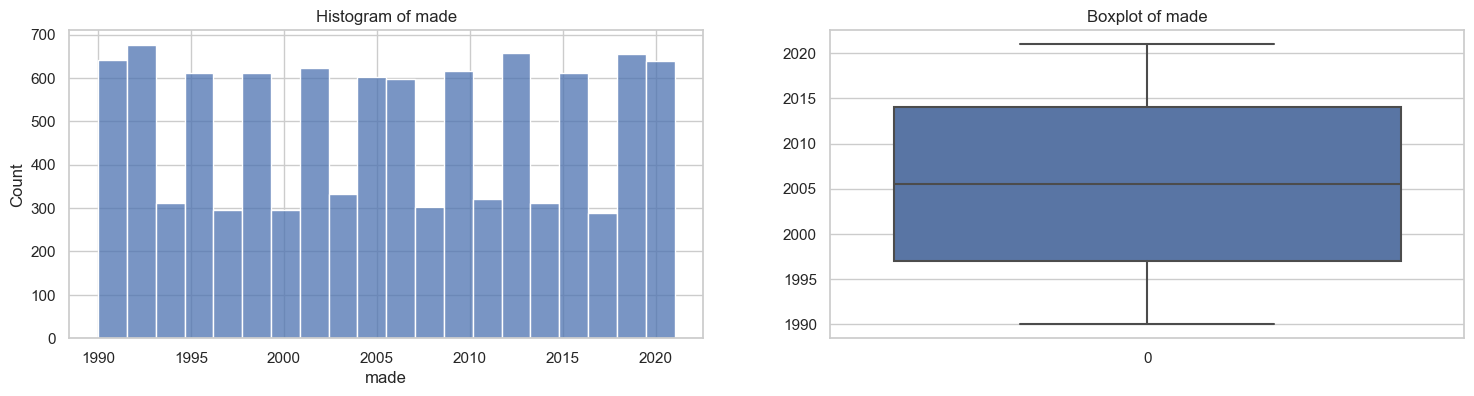

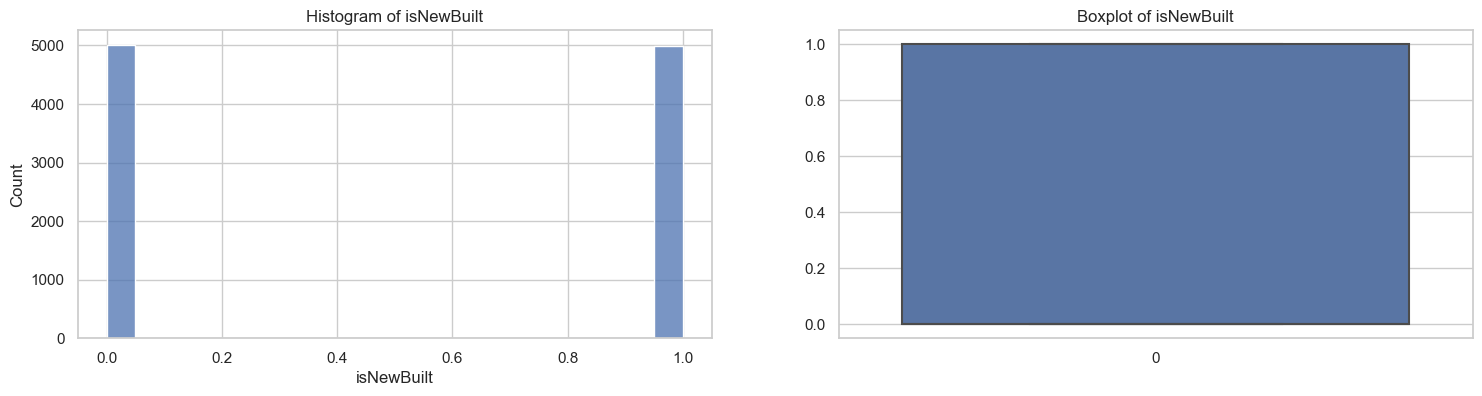

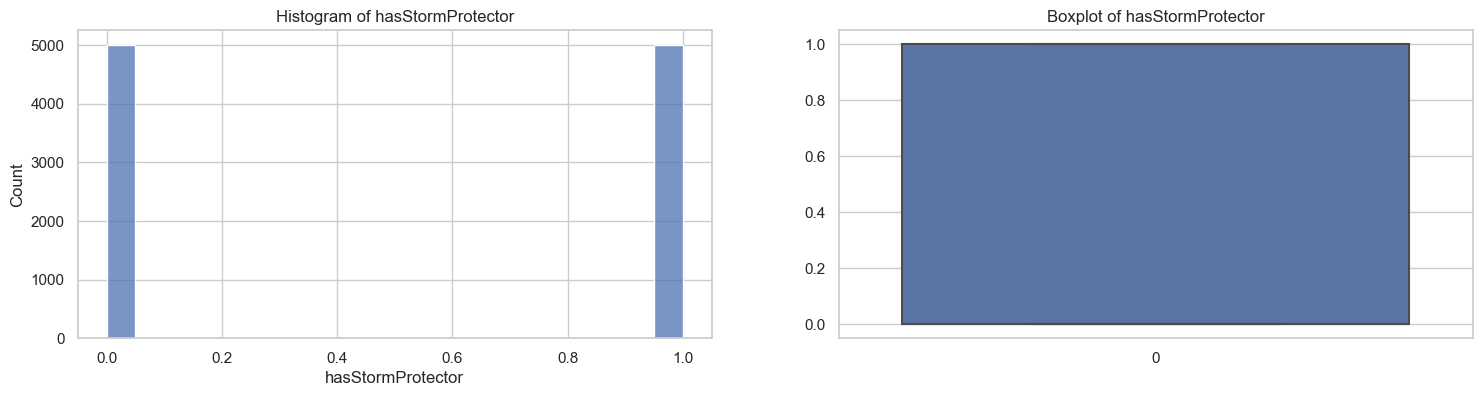

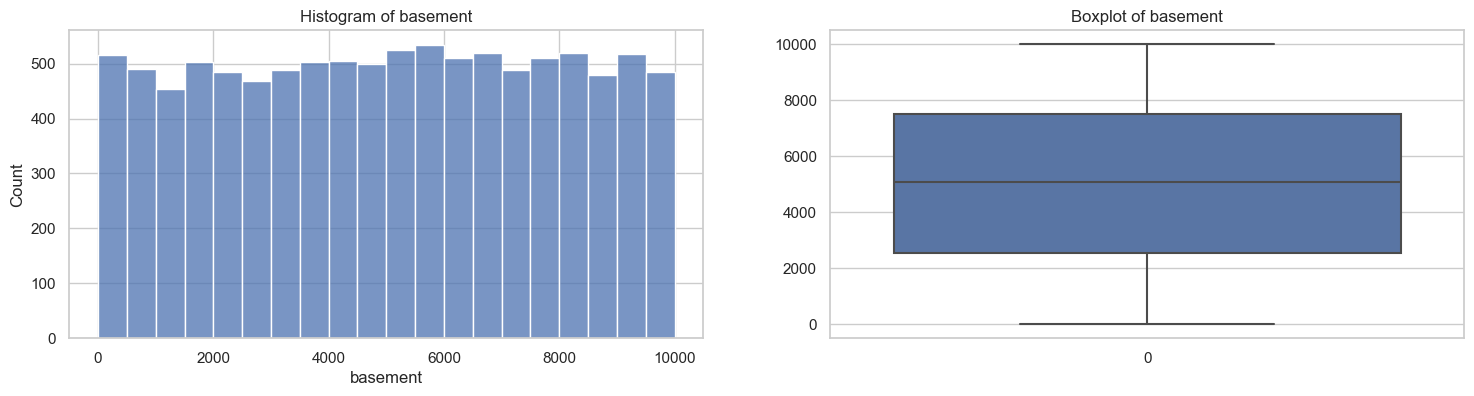

<Figure size 1800x400 with 0 Axes>

Skewness Value of attic : -0.016826101975310377
Skewness Value of garage : -0.01887403375328987
Skewness Value of hasStorageRoom : -0.012002016383307463
Skewness Value of hasGuestRoom : 0.007966378133967165


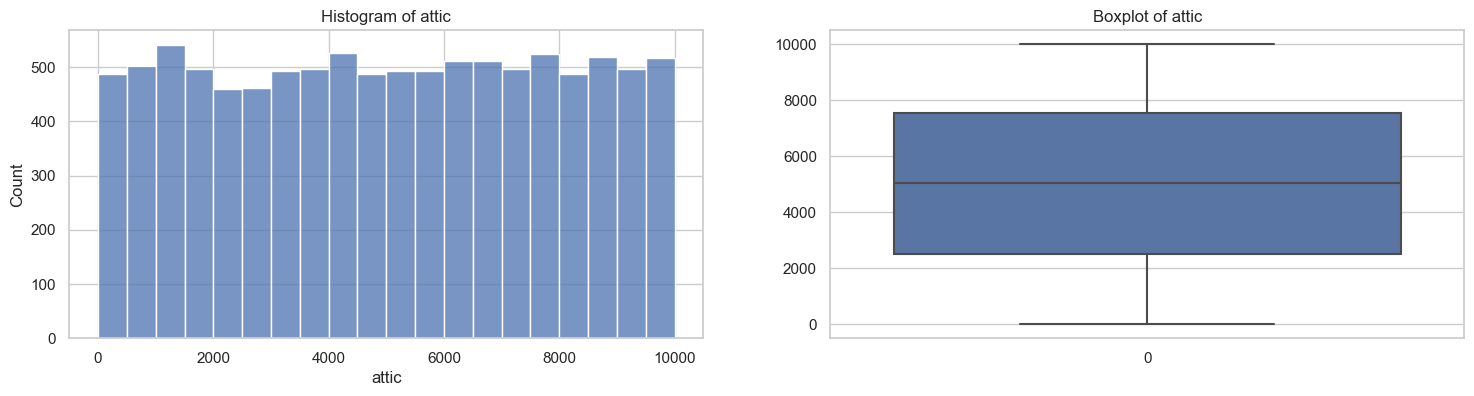

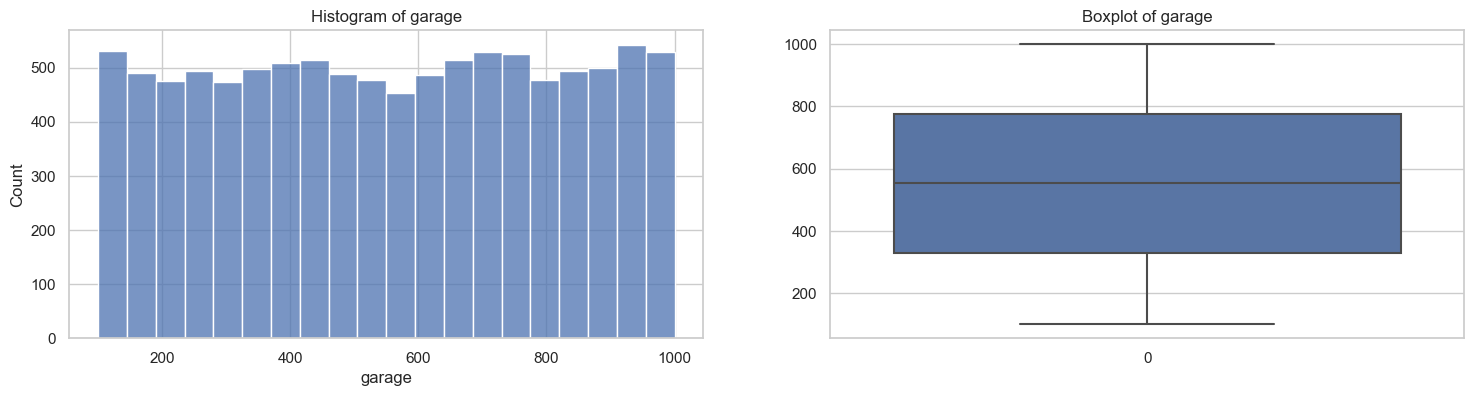

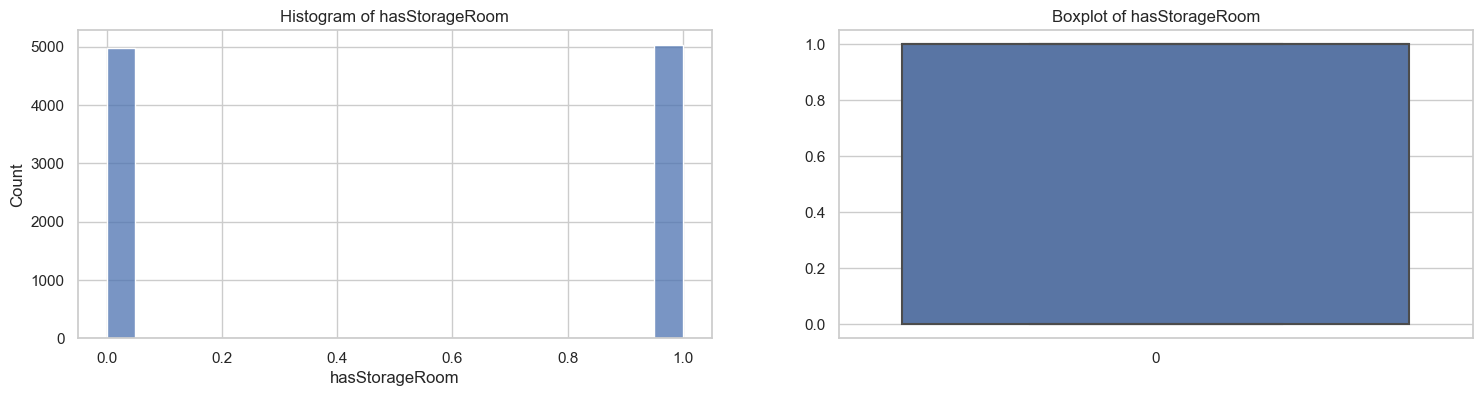

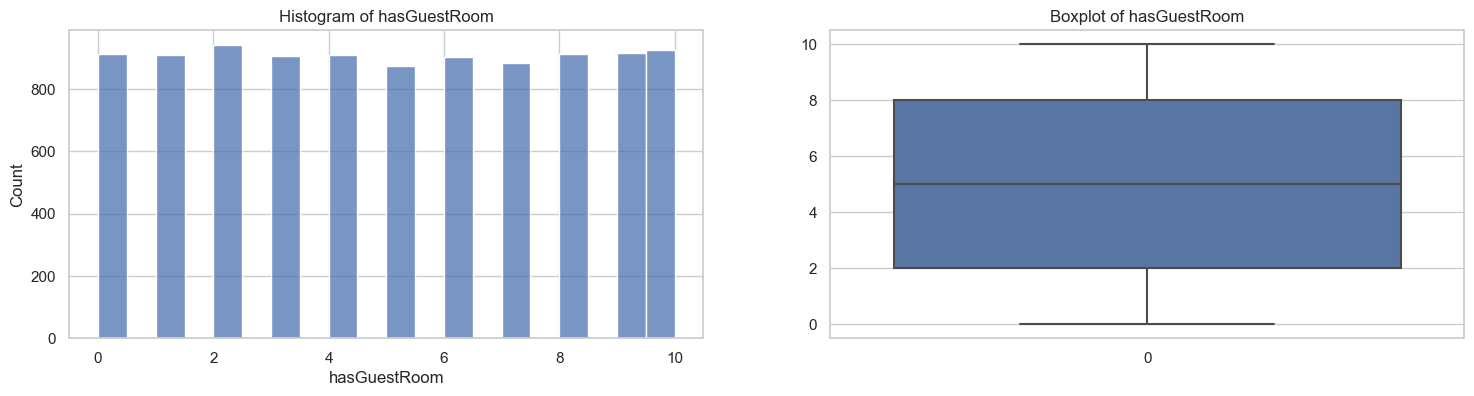

<Figure size 1800x400 with 0 Axes>

In [26]:
diagnostic_plots( data,'squareMeters','numberOfRooms','hasYard','hasPool')
diagnostic_plots2(data,'floors','cityCode','cityPartRange','numPrevOwners')
diagnostic_plots3 (data,'made','isNewBuilt','hasStormProtector','basement'	)
diagnostic_plots4(data,'attic','garage','hasStorageRoom','hasGuestRoom')

## Split X & y

In [27]:
# Splitting  `X` dan `y`

X = data.drop(['price','cityCode' ,'made'], axis=1)
y = data['price']
X

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityPartRange,numPrevOwners,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom
0,75523,3,0,1,63,3,8,0,1,4313,9005,956,0,7
1,80771,39,1,1,98,8,6,1,0,3653,2436,128,1,2
2,55712,58,0,1,19,6,8,0,0,2937,8852,135,1,9
3,32316,47,0,0,6,10,4,0,1,659,7141,359,0,3
4,70429,19,1,1,90,3,7,1,0,8435,2429,292,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1726,89,0,1,5,7,6,0,1,9311,1698,218,0,4
9996,44403,29,1,1,12,9,4,0,1,9061,1742,230,0,0
9997,83841,3,0,0,69,10,10,1,1,8304,7730,345,1,9
9998,59036,70,0,0,96,1,3,0,1,2590,6174,339,1,4


## Split Train & Test

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('Train Size : ', X_train.shape)
print('Test Size  : ', X_test.shape)
X_train

Train Size :  (8000, 14)
Test Size  :  (2000, 14)


,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityPartRange,numPrevOwners,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom
9254,81531,57,0,1,2,7,1,0,0,6192,9969,736,1,2
1561,78731,88,0,0,79,7,6,1,1,5914,6048,742,0,3
1670,78004,71,1,1,96,10,10,1,1,4527,2138,329,1,6
6087,15727,25,1,0,55,1,7,0,1,8350,1546,859,1,8
6669,3190,59,0,0,95,6,6,1,1,9709,6168,338,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,19387,17,0,0,64,3,4,1,0,9284,860,654,1,6
5191,92417,91,0,0,7,3,10,0,1,8642,1223,412,1,9
5390,98710,68,1,0,40,1,5,0,0,3411,7396,260,1,4
860,17051,46,1,1,43,2,2,1,1,6481,7029,346,0,2


## Scaling Using Pipeline

In [29]:
num_cols = ['squareMeters','numberOfRooms','floors','cityPartRange','numPrevOwners','basement','attic','garage','hasGuestRoom']
cat_cols = ['hasYard', 'hasPool' , 'isNewBuilt' , 'hasStormProtector', 'hasStorageRoom']

In [30]:
# split numeric dan catagories
# Train

X_train_num=X_train[num_cols]
X_train_cat = X_train[cat_cols]
# Test
X_test_num=X_test[num_cols]
X_test_cat=X_test[cat_cols]


In [31]:
# create pipeline to process numeric 
num_pipeline = make_pipeline(
    
    MinMaxScaler()
)

# Preprocessing numeric data
X_train_processed = num_pipeline.fit_transform(X_train_num)

In [32]:
X_train_processed

array([[0.81553729, 0.56565657, 0.01010101, ..., 0.99689969, 0.70666667,
        0.2       ],
       [0.78749887, 0.87878788, 0.78787879, ..., 0.60476048, 0.71333333,
        0.3       ],
       [0.7802189 , 0.70707071, 0.95959596, ..., 0.21372137, 0.25444444,
        0.6       ],
       ...,
       [0.98756296, 0.67676768, 0.39393939, ..., 0.73957396, 0.17777778,
        0.4       ],
       [0.1698527 , 0.45454545, 0.42424242, ..., 0.70287029, 0.27333333,
        0.2       ],
       [0.03564884, 0.83838384, 0.72727273, ..., 0.71187119, 0.79333333,
        1.        ]])

In [33]:
X_train_processed = pd.DataFrame(X_train_processed, columns=X_train_num.columns)

In [34]:
# concat numerical and categorical
X_train_combined = pd.concat([X_train_cat.reset_index(drop=True), X_train_processed.reset_index(drop=True)], axis=1)
X_train_combined

,hasYard,hasPool,isNewBuilt,hasStormProtector,hasStorageRoom,squareMeters,numberOfRooms,floors,cityPartRange,numPrevOwners,basement,attic,garage,hasGuestRoom
0,0,1,0,0,1,0.816,0.566,0.010,0.667,0.000,0.619,0.997,0.707,0.200
1,0,0,1,1,0,0.787,0.879,0.788,0.667,0.556,0.591,0.605,0.713,0.300
2,1,1,1,1,1,0.780,0.707,0.960,1.000,1.000,0.453,0.214,0.254,0.600
3,1,0,0,1,1,0.157,0.242,0.545,0.000,0.667,0.835,0.155,0.843,0.800
4,0,0,1,1,0,0.031,0.586,0.949,0.556,0.556,0.971,0.617,0.264,0.500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,0,0,1,0,1,0.193,0.162,0.636,0.222,0.333,0.928,0.086,0.616,0.600
7996,0,0,0,1,1,0.925,0.909,0.061,0.222,1.000,0.864,0.122,0.347,0.900
7997,1,0,0,0,1,0.988,0.677,0.394,0.000,0.444,0.341,0.740,0.178,0.400
7998,1,1,1,1,0,0.170,0.455,0.424,0.111,0.111,0.648,0.703,0.273,0.200


In [35]:
# fit X_test using pipeline
X_test_processed = num_pipeline.transform(X_test_num)

In [36]:
X_test_processed = pd.DataFrame(X_test_processed, columns=X_test_num.columns)

In [37]:
X_test_combined = pd.concat([X_test_cat.reset_index(drop=True), X_test_processed.reset_index(drop=True)], axis=1)

## Feature Selection

#### Pearson

In [38]:
# Pearson

Xy_train = pd.concat([X_train_num, y_train], axis=1)
Xy_corr = Xy_train.corr().price.sort_values(ascending= False)

In [39]:
# Show Correlation result
print(Xy_corr[Xy_corr>0])

price           1.000
squareMeters    1.000
numPrevOwners   0.015
cityPartRange   0.008
numberOfRooms   0.006
attic           0.001
basement        0.001
Name: price, dtype: float64


#### chi2squre

In [40]:
### chi2squre


chi_scores, p_values = [], []
for col in X_train_cat.columns:
    cont = pd.crosstab(X_train_cat[col], y)
    chi2, p, dof, ex = chi2_contingency(cont)
    chi_scores.append(chi2)
    p_values.append(p)

# create a DataFrame to show the results
results = pd.DataFrame({'feature': X_train_cat.columns, 'chi2_score': chi_scores, 'p_value': p_values})
print(results)

             feature  chi2_score  p_value
0            hasYard    8000.000    0.495
1            hasPool    8000.000    0.495
2         isNewBuilt    8000.000    0.495
3  hasStormProtector    8000.000    0.495
4     hasStorageRoom    8000.000    0.495


#### Multi

In [41]:
# Function to count VIF value
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X_train_combined.columns
    vif["VIF"] = [variance_inflation_factor(X_train_combined.values, i) for i in range(X_train_combined.shape[1])]
    vif = vif.sort_values(by=['VIF'],ascending=False)
    return(vif)

In [42]:
calc_vif(X_train_combined)

,variables,VIF
10,basement,3.646
6,numberOfRooms,3.635
12,garage,3.617
5,squareMeters,3.616
11,attic,3.615
7,floors,3.543
9,numPrevOwners,3.238
8,cityPartRange,3.224
13,hasGuestRoom,3.147
0,hasYard,1.957


In [43]:
# Fitur that we using 
X_train_final = X_train_combined.loc[:,['squareMeters','hasYard','hasPool','isNewBuilt','hasStormProtector','hasStorageRoom']]
X_test_final = X_test_combined.loc[:,['squareMeters','hasYard','hasPool','isNewBuilt','hasStormProtector','hasStorageRoom']]

# 6. Model Definition

In [44]:

model = LinearRegression()


ridge_model = Ridge()


lasso_model = Lasso()


svr_model = SVR()


# 7. Model Training 

## Linear Regression

In [45]:
# Train to model
model.fit(X_train_final, y_train)

LinearRegression()

In [46]:
# Predict Train Set and Test-Set pada linear regression
y_pred_train_lr = model.predict(X_train_final)
y_pred_test_lr = model.predict(X_test_final)
y_pred_train_lr

array([8159441.13640938, 7876574.49729142, 7809942.46176249, ...,
       9877330.6719263 , 1714581.30037408,  374178.05805159])

In [47]:
# Model Evaluation using MAE



print('Error - Train Set : ', mean_absolute_error(y_train, y_pred_train_lr))
print('')
print('Error - Test Set  : ', mean_absolute_error(y_test, y_pred_test_lr))
print('')

error_train = mean_absolute_error(y_train, y_pred_train_lr)
error_test = mean_absolute_error(y_test, y_pred_test_lr)

overfitting = (error_train - error_test) / error_train * 100
print('Presentase selisih: {:.2f}%'.format(overfitting))

Error - Train Set :  1977.868150368373

Error - Test Set  :  1990.222071333517

Presentase selisih: -0.62%


#### Train

In [48]:
rmse_train_lr = np.sqrt(mean_squared_error(y_train, y_pred_train_lr))
r2_train_lr = r2_score(y_train, y_pred_train_lr)
mae_train_lr = mean_absolute_error(y_train, y_pred_train_lr)
print("RMSE:", rmse_train_lr)
print("R2 Score:", r2_train_lr)
print("MAE:", mae_train_lr)

RMSE: 2466.6893354905833
R2 Score: 0.9999992538341818
MAE: 1977.868150368373


#### Test

In [49]:
rmse_test_lr = np.sqrt(mean_squared_error(y_test, y_pred_test_lr))
r2_test_lr = r2_score(y_test, y_pred_test_lr)
mae_test_lr = mean_absolute_error(y_test, y_pred_test_lr)
print("RMSE:", rmse_test_lr)
print("R2 Score:", r2_test_lr)
print("MAE:", mae_test_lr)

RMSE: 2485.006134280662
R2 Score: 0.9999992949620403
MAE: 1990.222071333517


#### Crosvalidation

In [50]:

# cross-validation with 5-fold
scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')

# change score to RMSE
rmse_scores = np.sqrt(-scores)

# show cross-validation result
print("RMSE Scores:", rmse_scores)
print("Mean RMSE:", rmse_scores.mean())
print("Standard Deviation of RMSE:", rmse_scores.std())

RMSE Scores: [1976.27848094 1908.12140437 1841.5301183  1855.96006507 1918.89858997]
Mean RMSE: 1900.1577317302672
Standard Deviation of RMSE: 48.165629039447765


## Lasso

In [51]:

# Training model
lasso_model.fit(X_train_final, y_train)

Lasso()

In [52]:
# Predict Train Set and Test-Set
y_pred_train_lasso = lasso_model.predict(X_train_final)
y_pred_test_lasso = lasso_model.predict(X_test_final)
y_pred_train_lasso

array([8159438.97841793, 7876572.84623938, 7809928.69607577, ...,
       9877326.3616239 , 1714579.47598022,  374185.99716746])

In [53]:
# Model Evaluation using MAE



print('Error - Train Set : ', mean_absolute_error(y_train, y_pred_train_lasso))
print('')
print('Error - Test Set  : ', mean_absolute_error(y_test, y_pred_test_lasso))
print('')

error_train = mean_absolute_error(y_train, y_pred_train_lasso)
error_test = mean_absolute_error(y_test, y_pred_test_lasso)

overfitting = (error_train - error_test) / error_train * 100
print('Presentase selisih: {:.2f}%'.format(overfitting))

Error - Train Set :  1977.992292233481

Error - Test Set  :  1990.4006683941564

Presentase selisih: -0.63%


#### Train

In [54]:
rmse_train_lasso = np.sqrt(mean_squared_error(y_train, y_pred_train_lasso))
r2_train_lasso = r2_score(y_train, y_pred_train_lasso)
mae_train_lasso = mean_absolute_error(y_train, y_pred_train_lasso)
print("RMSE:", rmse_train_lasso)
print("R2 Score:", r2_train_lasso)
print("MAE:", mae_train_lasso)

RMSE: 2466.6961020612325
R2 Score: 0.999999253830088
MAE: 1977.992292233481


#### Test

In [55]:
rmse_test_lasso = np.sqrt(mean_squared_error(y_test, y_pred_test_lasso))
r2_test_lasso = r2_score(y_test, y_pred_test_lasso)
mae_test_lasso = mean_absolute_error(y_test, y_pred_test_lasso)
print("RMSE:", rmse_test_lasso)
print("R2 Score:", r2_test_lasso)
print("MAE:", mae_test_lasso)


RMSE: 2485.077818457139
R2 Score: 0.9999992949213637
MAE: 1990.4006683941564


## Ridge

In [56]:

# Training model
ridge_model.fit(X_train_final, y_train)

Ridge()

In [57]:
# Predict Train-Set and Test-Set
y_pred_train_rg = ridge_model.predict(X_train_final)
y_pred_test_rg = ridge_model.predict(X_test_final)
y_pred_train_rg

array([8154433.54544142, 7872210.69201334, 7805469.0058693 , ...,
       9869891.75522456, 1719518.57500726,  381203.35041442])

In [58]:
# Model Evaluation using MAE



print('Error - Train Set : ', mean_absolute_error(y_train, y_pred_train_rg))
print('')
print('Error - Test Set  : ', mean_absolute_error(y_test, y_pred_test_rg))
print('')

error_train = mean_absolute_error(y_train, y_pred_train_rg)
error_test = mean_absolute_error(y_test, y_pred_test_rg)

overfitting = (error_train - error_test) / error_train * 100
print('Presentase selisih: {:.2f}%'.format(overfitting))

Error - Train Set :  4183.326316971301

Error - Test Set  :  4344.609256944392

Presentase selisih: -3.86%


#### Train

In [59]:
rmse_train_rg = np.sqrt(mean_squared_error(y_train, y_pred_train_rg))
r2_train_rg = r2_score(y_train, y_pred_train_rg)
mae_train_rg = mean_absolute_error(y_train, y_pred_train_rg)
print("RMSE:", rmse_train_rg)
print("R2 Score:", r2_train_rg)
print("MAE:", mae_train_rg)

RMSE: 5009.374047084646
R2 Score: 0.9999969226750309
MAE: 4183.326316971301


### Test

In [60]:
rmse_test_rg = np.sqrt(mean_squared_error(y_test, y_pred_test_rg))
r2_test_rg = r2_score(y_test, y_pred_test_rg)
mae_test_rg = mean_absolute_error(y_test, y_pred_test_rg)
print("RMSE:", rmse_test_rg)
print("R2 Score:", r2_test_rg)
print("MAE:", mae_test_rg)


RMSE: 5183.7086633985455
R2 Score: 0.9999969321173708
MAE: 4344.609256944392


## SVR

In [61]:

# training model
svr_model.fit(X_train_final, y_train)

SVR()

In [62]:
# Predict Train Set and Test-Set
y_pred_train_svr = svr_model.predict(X_train_final)
y_pred_test_svr = svr_model.predict(X_test_final)
y_pred_train_svr

array([4987354.06993537, 4987356.4847269 , 4987320.53366253, ...,
       4987446.98167921, 4987010.27381553, 4986956.64946903])

In [63]:
# Model Evaluation using MAE



print('Error - Train Set : ', mean_absolute_error(y_train, y_pred_train_svr))
print('')
print('Error - Test Set  : ', mean_absolute_error(y_test, y_pred_test_svr))
print('')

error_train = mean_absolute_error(y_train, y_pred_train_svr)
error_test = mean_absolute_error(y_test, y_pred_test_svr)

overfitting = (error_train - error_test) / error_train * 100
print('Presentase selisih: {:.2f}%'.format(overfitting))

Error - Train Set :  2463603.6413542232

Error - Test Set  :  2576676.421105725

Presentase selisih: -4.59%


#### Train

In [64]:
rmse_train_svr = np.sqrt(mean_squared_error(y_train, y_pred_train_svr))
r2_train_svr = r2_score(y_train, y_pred_train_svr)
mae_train_svr = mean_absolute_error(y_train, y_pred_train_svr)
print("RMSE:", rmse_train_svr)
print("R2 Score:", r2_train_svr)
print("MAE:", mae_train_svr)


RMSE: 2855538.579107609
R2 Score: 4.0290315252655695e-05
MAE: 2463603.6413542232


#### Test

In [65]:
rmse_test_svr = np.sqrt(mean_squared_error(y_test, y_pred_test_svr))
r2_test_svr = r2_score(y_test, y_pred_test_svr)
mae_test_svr = mean_absolute_error(y_test, y_pred_test_svr)
print("RMSE:", rmse_test_svr)
print("R2 Score:", r2_test_svr)
print("MAE:", mae_test_svr)


RMSE: 2961947.840843145
R2 Score: -0.0016416683069213622
MAE: 2576676.421105725


# 8. Model Evaluation

## Linear Regression

In [66]:
# save result to dictionary
eval_dict = {
    'Metrics': ['RMSE', 'R2 Score', 'MAE'],
    'Train': [rmse_train_lr, r2_train_lr, mae_train_lr],
    'Test': [rmse_test_lr, r2_test_lr, mae_test_lr]
}

# Create dataframe
eval_df = pd.DataFrame(eval_dict)

# show dataframe
eval_df

,Metrics,Train,Test
0,RMSE,2466.689,2485.006
1,R2 Score,1.000,1.000
2,MAE,1977.868,1990.222


## Lasso

In [67]:
# save result to dictionary
eval_dict_lasso = {
    'Metrics': ['RMSE', 'R2 Score', 'MAE'],
    'Train': [rmse_train_lasso, r2_train_lasso, mae_train_lasso],
    'Test': [rmse_test_lasso, r2_test_lasso, mae_test_lasso]
}

# create dataframe
eval_df_lasso = pd.DataFrame(eval_dict_lasso)

# show dataframe
eval_df_lasso

,Metrics,Train,Test
0,RMSE,2466.696,2485.078
1,R2 Score,1.000,1.000
2,MAE,1977.992,1990.401


## Ridge

In [68]:
# save result to dictionary
eval_dict_rg = {
    'Metrics': ['RMSE', 'R2 Score', 'MAE'],
    'Train': [rmse_train_rg, r2_train_rg, mae_train_rg],
    'Test': [rmse_test_rg, r2_test_rg, mae_test_rg]
}

# create dataframe
eval_df_rg = pd.DataFrame(eval_dict_rg)

# show evaluation tabel
eval_df_rg

,Metrics,Train,Test
0,RMSE,5009.374,5183.709
1,R2 Score,1.000,1.000
2,MAE,4183.326,4344.609


## SVR

In [69]:
# save result to dictionary
eval_dict_svr = {
    'Metrics': ['RMSE', 'R2 Score', 'MAE'],
    'Train': [rmse_train_svr, r2_train_svr, mae_train_svr],
    'Test': [rmse_test_svr, r2_test_svr, mae_test_svr]
}

# create dataframe
eval_df_svr = pd.DataFrame(eval_dict_svr)

# show evaluation tabel
eval_df_svr

,Metrics,Train,Test
0,RMSE,2855538.579,2961947.841
1,R2 Score,0.000,-0.002
2,MAE,2463603.641,2576676.421


# 9. Model saving

In [70]:
# Save File

# Modelling
with open('model.pkl', 'wb') as file_1:
    pickle.dump(model, file_1)


# Pre-processing

with open('pipeline.pkl', 'wb') as file_2:
    pickle.dump(num_pipeline, file_2)
    
    
# List Numeric & Category
with open('num_cols.txt', 'w') as file_3:
    json.dump(num_cols, file_3)

with open('cat_cols.txt', 'w') as file_4:
    json.dump(cat_cols, file_4)
    